In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [2]:
train_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\crop_dataset\crop_dataset"
test_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_data\test_data"

train_class_folders = os.listdir(train_folder)

# Dictionary for naming the class types

classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

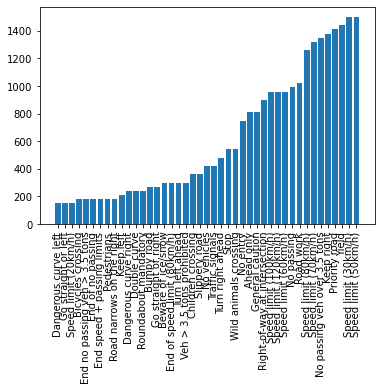

In [3]:
# Get number of instances per class and visualize the data

train_numberOfInstancesPerClass = []
class_names = []

for folder in train_class_folders:
    train_files = os.listdir(train_folder + '/' + folder)
    train_numberOfInstancesPerClass.append(len(train_files))
    class_names.append(classes[int(folder)])

pairs = zip(train_numberOfInstancesPerClass, class_names)
pairs = sorted(pairs)
tuples = zip(*pairs)
train_numberOfInstancesPerClass, class_names = [
    list(tuple) for tuple in tuples]

plt.bar(class_names, train_numberOfInstancesPerClass)
plt.xticks(class_names, rotation='vertical')
plt.show()

In [4]:
# Creating image data and label arrs for training/validation sets

images = []
labels = []

for imgClass in range(len(classes)):
    imgFolder_path = train_folder + "\\" + str(imgClass).zfill(5)
    #print(imgFolder_path)
    imgFolder = os.listdir(imgFolder_path)

    for img in imgFolder:
        image = plt.imread(imgFolder_path + "\\" + img)  # get an image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((32, 32))  # resize all images to same size
        images.append(np.array(image))
        labels.append(imgClass)

images = np.array(images)
labels = np.array(labels)

In [5]:
# Shuffle the dataset

shuffle_indexes = np.arange(images.shape[0])
np.random.shuffle(shuffle_indexes)
images = images[shuffle_indexes]
labels = labels[shuffle_indexes]

In [6]:
# Create the training and validation sets 

x_train, x_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.3, shuffle=True)

x_train = x_train/255
x_val = x_val/255  # !!!! WHY?

# Convert classes to one-hot vectors
y_train = keras.utils.to_categorical(y_train, len(classes))
y_val = keras.utils.to_categorical(y_val, len(classes))

In [7]:
# Load the test data and create the test sets

test_csv = pd.read_csv(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_labels.csv")
labels = test_csv['label'].values  # y_test
images = test_csv['image'].values
x_test = []

for imagePath in images:
    image = plt.imread(test_folder+ "\\" + imagePath)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((32, 32))
    x_test.append(np.array(image))

x_test = np.array(x_test)
x_test = x_test/255

In [8]:
# Get pretrained model

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(32,32,3),
                   #pooling='avg',
                   weights='imagenet')

vgg_model_unfreeze_2block = Sequential()
pretrained_model.trainable = True
for layer in pretrained_model.layers[:12]:
    layer.trainable = False
    
        
#for layer in pretrained_model.layers[:-1]: # go through until last layer
    #resnet_model.add(layer)
    

#resnet_model.add(tf.keras.layers.BatchNormalization(renorm=True))
vgg_model_unfreeze_2block.add(pretrained_model)
#resnet_model.add(tf.keras.layers.BatchNormalization())
vgg_model_unfreeze_2block.add(Flatten())

prediction_layer = tf.keras.layers.Dense(43, activation='softmax')
vgg_model_unfreeze_2block.add(prediction_layer)

#model.compile(optimizer='adam', loss='categorical_crossentropy')
for i, layer in enumerate(pretrained_model.layers):
        print(i, layer.name, "-", layer.trainable)

0 input_layer - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_conv4 - False
11 block3_pool - False
12 block4_conv1 - True
13 block4_conv2 - True
14 block4_conv3 - True
15 block4_conv4 - True
16 block4_pool - True
17 block5_conv1 - True
18 block5_conv2 - True
19 block5_conv3 - True
20 block5_conv4 - True
21 block5_pool - True


In [9]:
lr = 0.0001
epochs = 15
#opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
opt = Adam(learning_rate=lr)

In [10]:
# Compile model
vgg_model_unfreeze_2block.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = vgg_model_unfreeze_2block.fit(x_train, y_train,
batch_size=256, epochs=epochs, validation_data=(x_val,
y_val))

Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.4274 - loss: 2.0219 - val_accuracy: 0.8163 - val_loss: 0.5590
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.8423 - loss: 0.4595 - val_accuracy: 0.9140 - val_loss: 0.2545
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.9267 - loss: 0.2181 - val_accuracy: 0.9223 - val_loss: 0.2423
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.9481 - loss: 0.1508 - val_accuracy: 0.9379 - val_loss: 0.1994
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.9598 - loss: 0.1187 - val_accuracy: 0.9560 - val_loss: 0.1459
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9700 - loss: 0.0896 - val_accuracy: 0.9468 - val_loss: 0.1630
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.9778 - loss: 0.0646 - val_accuracy: 0.9732 - val_loss: 0.0971
Epoch 8/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.9831 - loss: 0.0495 - val_accuracy: 0.9632 - v

In [12]:
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)


In [13]:
test_loss, test_acc = vgg_model_unfreeze_2block.evaluate(x_test, labels_one_hot)
print('Test accuracy:', test_acc)


395/395 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - accuracy: 0.8464 - loss: 0.7212
Test accuracy: 0.8505938053131104


In [14]:
def plot_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,2.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

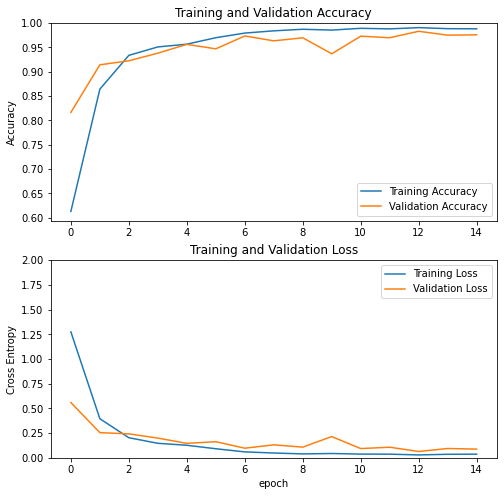

In [15]:
plot_acc(history)

In [21]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = vgg_model_unfreeze_2block.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 71s 180ms/step
Macro-Ortalama Kesinlik: 0.8231376267136664
Macro-Ortalama Duyarlılık: 0.7987820056680018
Macro-Ortalama F1 Skoru: 0.7984378814955346

Mikro-Ortalama Kesinlik: 0.8505938242280285
Mikro-Ortalama Duyarlılık: 0.8505938242280285
Mikro-Ortalama F1 Skoru: 0.8505938242280285


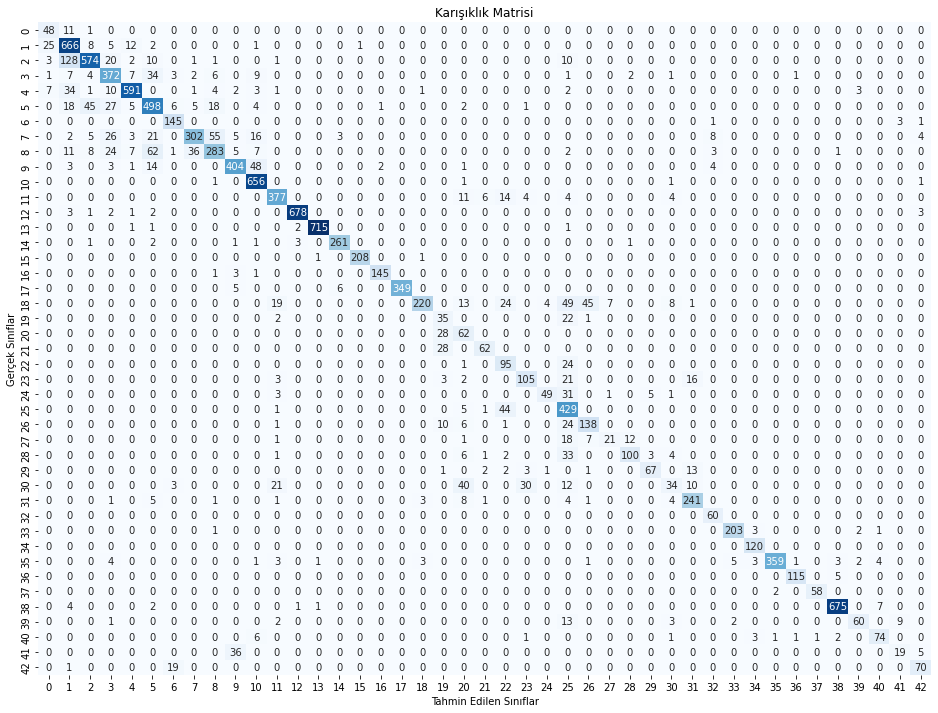

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()
